# Projet numérique

Equations de Lokta-Volterra:

$\dot{x_1} = x_1 (\alpha - \beta x_2)$

$\dot{x_2} = - x_2 (\gamma - \delta x_1)$

où $x_1$ et $x_2$ désignent le nombre (positif de proies et de prédateurs respectivements et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [3]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt

## Question 1

Interprétation physique de chacun des termes :

* $\alpha$ est le taux de reproduction des proies, indépendamment des prédateurs
* $\beta$ est le taux de mortalité des proies à cause des prédateurs
* $\gamma$ est le taux de reproduction des prédateurs, dépendant du nombre de proies rencontrées et mangées
* $\delta$ est le taux de mortalité des prédateurs, indépendamment des proies

Points d'équilibre :
Soit $(x_1,x_2) \in \mathbb{R^2}$,

$
(x_1,x_2) \: point \: d'équilibre
\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 (\alpha - \beta x_2) = 0 \\
        & - x_2 (\gamma - \delta x_1) = 0\\
      \end{aligned}
    \right.
\end{equation}
$
$\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = 0 \\
        & x_2 = 0\\
      \end{aligned}
    \right.
\end{equation}
$
ou
$\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = \frac{\gamma}{\delta} \\
        & x_2 = \frac{\alpha}{\beta}\\
      \end{aligned}
    \right.
\end{equation}
$
car les paramètres $\delta$ et $\beta$ sont non nuls.

Donc il existe 2 points d'équilibres :
* (0,0)
* $\bar{x} = (\frac{\gamma}{\delta} , \frac{\alpha}{\beta}) \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}$ car les paramètres $\alpha$, $\beta$, $\gamma$, $\delta$ sont strictements positifs.

Le premier point d'équilibre semble stable cra s'il n'y a ni proie ni prédateurs, l'état de l'environnement ne va pas changer.

Pour l'autre point d'équilibre, on ne peut pas dire.

## Question 2

## Question 3

## Question 4

On considère la fonction $H (x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$ définie sur $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$. Elle est dérivable sur l'ensemble $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$ et 

$\forall (x_1,x_2 \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}, 
\begin{align}
    \nabla H (x_1,x_2) = & \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{align}$

## Question 5

In [2]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [7]:
def H(x,y, alpha=1, beta=1, gamma=1, delta=1):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

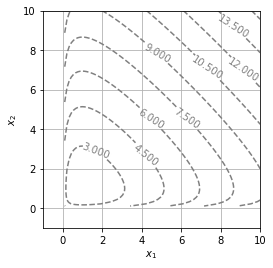

In [15]:
display_contour(
    H, 
    x=np.linspace(-1, 10.0, 100), 
    y=np.linspace(-1, 10.0, 100), 
    levels=10 # 10 levels, automatically selected
)